# Task 2: Why are the predictions to good (/bad)?

## Question

> I ran the following code for a binary classification task w/ an SVM in both R (first sample) and Python (second example).
>
> Given randomly generated data (X) and response (Y), this code performs leave group out cross validation 1000 times. Each entry of Y is therefore the mean of the prediction across CV iterations.
> 
> Computing area under the curve should give ~0.5, since X and Y are completely random. However, this is not what we see. Area under the curve is frequently significantly higher than 0.5. The number of rows of X is very small, which can obviously cause problems.
>
> Any idea what could be happening here? I know that I can either increase the number of rows of X or decrease the number of columns to mediate the problem, but I am looking for other issues.

```R
Y=as.factor(rep(c(1,2), times=14))
X=matrix(runif(length(Y)*100), nrow=length(Y))

library(e1071)
library(pROC)

colnames(X)=1:ncol(X)
iter=1000
ansMat=matrix(NA,length(Y),iter)
for(i in seq(iter)){    
    #get train

    train=sample(seq(length(Y)),0.5*length(Y))
    if(min(table(Y[train]))==0)
    next

    #test from train
    test=seq(length(Y))[-train]

    #train model
    XX=X[train,]
    YY=Y[train]
    mod=svm(XX,YY,probability=FALSE)
    XXX=X[test,]
    predVec=predict(mod,XXX)
    RFans=attr(predVec,'decision.values')
    ansMat[test,i]=as.numeric(predVec)
}

ans=rowMeans(ansMat,na.rm=TRUE)

r=roc(Y,ans)$auc
print(r)
```

Similarly, when I implement the same thing in Python I get similar results.



In [3]:
Y = np.array([1, 2]*14)
X = np.random.uniform(size=[len(Y), 100])
n_iter = 1000
ansMat = np.full((len(Y), n_iter), np.nan)
for i in range(n_iter):
    # Get train/test index
    train = np.random.choice(range(len(Y)), size=int(0.5*len(Y)), replace=False, p=None)
    if len(np.unique(Y)) == 1:
        continue
    test = np.array([i for i in range(len(Y)) if i not in train])
    # train model
    mod = SVC(probability=False)
    mod.fit(X=X[train, :], y=Y[train])
    # predict and collect answer
    ansMat[test, i] = mod.predict(X[test, :])
ans = np.nanmean(ansMat, axis=1)
fpr, tpr, thresholds = roc_curve(Y, ans, pos_label=1)
print(auc(fpr, tpr))

0.9183673469387755


## Your answer

In [16]:
import numpy as np
from sklearn import *
import matplotlib.pyplot as plt

0.5510204081632653
Overall Average AUC: 0.5510204081632653


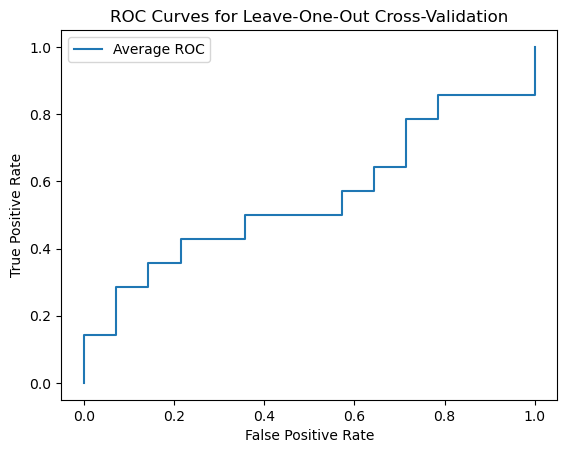

In [22]:
Y = np.array([1, 2]*14)
X = np.random.rand(len(Y), 100)
n_iter = 1000
ansMat = np.full((len(Y), n_iter), np.nan)

for i in range(n_iter):
    # get train/test index
    train = np.random.choice(range(len(Y)), size=int(0.5*len(Y)), replace=False, p=None)

    if len(np.unique(Y)) == 1:
        continue

    test = np.array([i for i in range(len(Y)) if i not in train])

    # train model
    clf = svm.SVC(kernel='linear')
    clf.fit(X=X[train, :], y=Y[train])

    # predict
    ansMat[test, i] = clf.predict(X[test, :])

ans = np.nanmean(ansMat, axis=1)
fpr, tpr, thresholds = roc_curve(Y, ans, pos_label=1)
print(auc(fpr, tpr))

# overall AUC
print(f"Overall Average AUC: {auc(fpr, tpr)}")

# plot average ROC curve
fpr, tpr, thresholds = roc_curve(Y, np.nanmean(ansMat, axis=1), pos_label=1)
plt.plot(fpr, tpr, label="Average ROC")

# show plots
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Leave-One-Out Cross-Validation")
plt.legend()
plt.show()

Overall Average AUC: 0.5095238095238095
Average of Individual AUCs: 0.5095238095238095
Standard Deviation of Individual AUCs: 0.024281045302822782


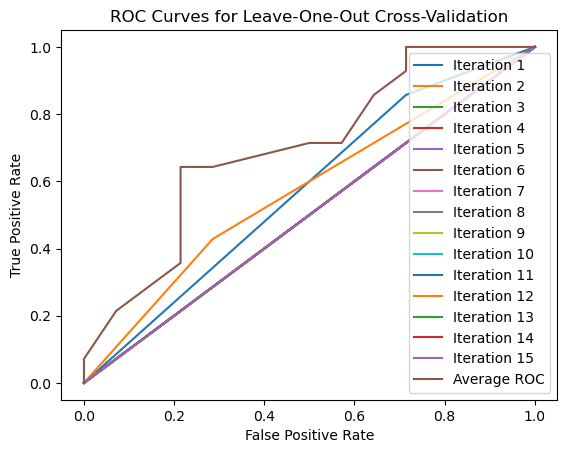

In [23]:

# Generate random data
Y = np.array([1, 2]*14)
X = np.random.uniform(size=[len(Y), 100])

# Define number of iterations and initialize variables
n_iter = 15
ansMat = np.full((len(Y), n_iter), np.nan)

# Track average AUC across iterations
avg_auc = np.zeros(n_iter)

for i in range(n_iter):
    # Get train/test index with shuffle
    train_indices = np.random.permutation(range(len(Y)))
    train = train_indices[:int(0.5*len(Y))]
    test = train_indices[int(0.5*len(Y)):]

    # Check for class imbalance before training
    if len(np.unique(Y[train])) == 1:
        continue

    # Train model
    mod = SVC(probability=False)
    mod.fit(X=X[train, :], y=Y[train])

    # Predict and collect answer
    ansMat[test, i] = mod.predict(X[test, :])

    # Calculate individual AUC for each iteration
    fpr, tpr, thresholds = roc_curve(Y[test], ansMat[test, i], pos_label=1)
    avg_auc[i] = auc(fpr, tpr)

    # Optionally plot individual ROC curve for analysis
    plt.plot(fpr, tpr, label=f"Iteration {i+1}")

# Calculate overall average AUC
overall_auc = np.mean(avg_auc)


print(f"Overall Average AUC: {overall_auc}")
print(f"Average of Individual AUCs: {np.mean(avg_auc)}")
print(f"Standard Deviation of Individual AUCs: {np.std(avg_auc)}")

# plot average ROC curve
fpr, tpr, thresholds = roc_curve(Y, np.nanmean(ansMat, axis=1), pos_label=1)
plt.plot(fpr, tpr, label="Average ROC")

# ROC curve plots
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Leave-One-Out Cross-Validation")
plt.legend()
plt.show() 


## Answer:

What I got from the proposed code is that it works with a large amount of sample data and highly correlated variables.
The data only has 14 raws you mention in the question, but it can be increased. Another idea can be shuffling the raw and column after each iteration. Therefore, in the following code, I will shuffle data before splitting, which causes more randomness in train/test splits. This gives every observation a chance to be seen in the test and train sets. 

## Feedback

Was this exercise is difficult or not? In either case, briefly describe why.

Compared to task 1, this exercise was good since I could have reached the results quickly. However, in massive datasets, for me, as a person who mainly works on NLP and text datasets,  finding insight into data and proposing a solution for reforming the data in the shape and form to be used in the Machine Learning models is a challenge.This question and exercise have been truly inspiring and have helped me to learn and grow with each step.